## 다중 서브플롯 (Multiple Subplots)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

### plt.axes : 직접 만든 서브 플롯

x, y 위치를 0.65로 설정 : 그림 너비의 65%와 높이의 65%에서 시작

x, y 범위를 0.2로 설정 : 축의 크기는 그림 너비와 높이의 20%

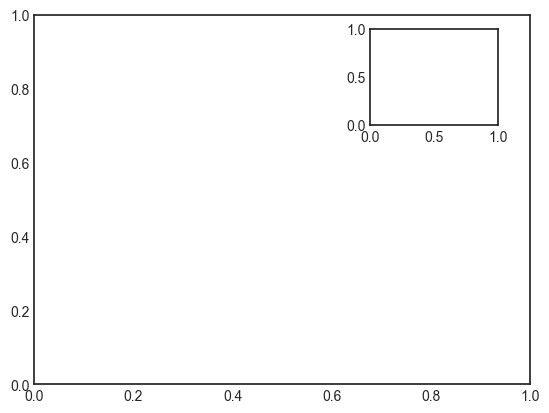

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

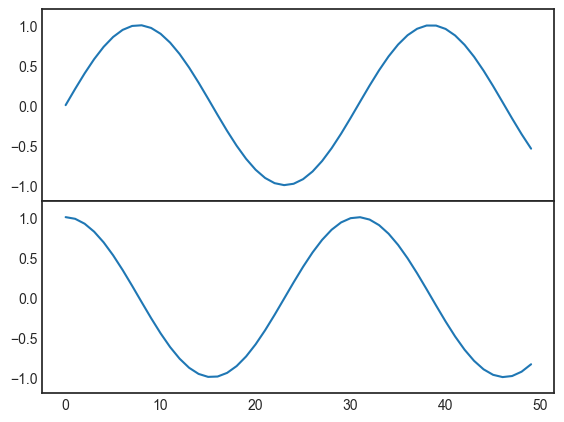

In [6]:
# 객체 지향에서 유사한 것 : fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],      #left, bottom, width, height
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### plt.subplt : 간단한 서브플롯의 그리드

**plt.sublot(a, b, c)**
왼쪽 상단에서 오른쪽 하단으로 이어지는 도식에서 만들 행 갯수(a), 열 갯수(b), 플롯의 인덱스(c) 를 의미

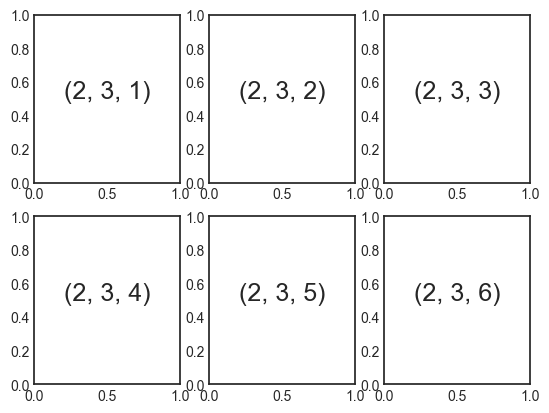

In [7]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

**plt.subplots_adjusts** 는 이 플롯들 사이의 간격을 조정하는데 사용

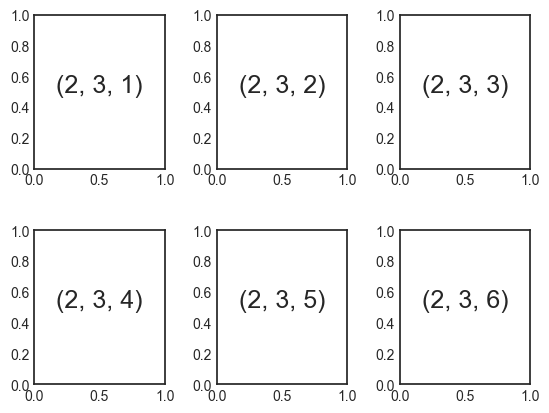

In [8]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

### plt.subplots :  한 번에 전체 그리드 만들기

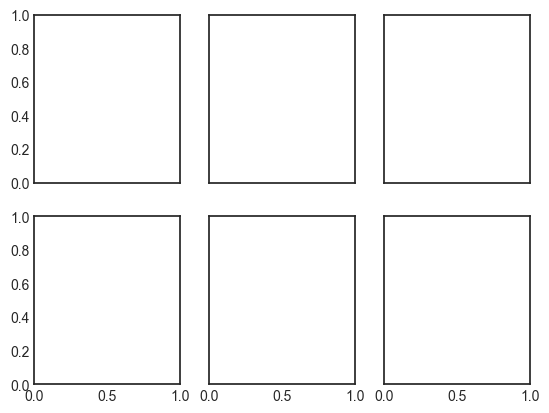

In [9]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

### plt.GridSpec : 복잡한 배치

서브플롯을 규칙적으로 배치하는 그리드를 넘어 여러 행과 열로 확장하려면 **plt.GridSpec()**을 사용하는 것이 좋다. 이것이 플롯을 만들지는 않고, 단순히 명령어가 인식하는 편리한 인터페이스일 뿐이다.

예를 들어, 너비와 높이 여백을 지정한 두 개의 행과 세 개의 열로 이루어진 그리드에 대한 gridspec은 다음과 같다.

In [10]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

이를 토대로 익숙한 파이썬 슬라이싱 구문을 사용해 각 서브플롯의 위치와 범위를 지정 가능

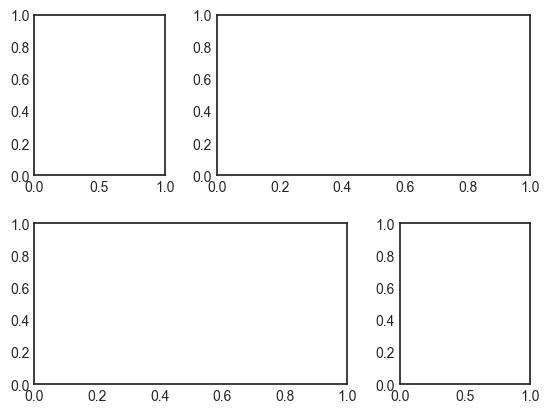

In [11]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

예를 들어 다중 축 히스토그램을 만들때 자주 사용 됨

In [ ]:
# 정규 분포 데이터 만들기
mean = [0, 0]
cov = [[1, 1], [1, 2]]
rng = np.random.default_rng(1701)
x, y = rng.multivariate_normal(mean, cov, 3000).T

# GridSpec 축 설정
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 메인 축에 점 산포
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 보조 축상에 히스토그램 만들기
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()